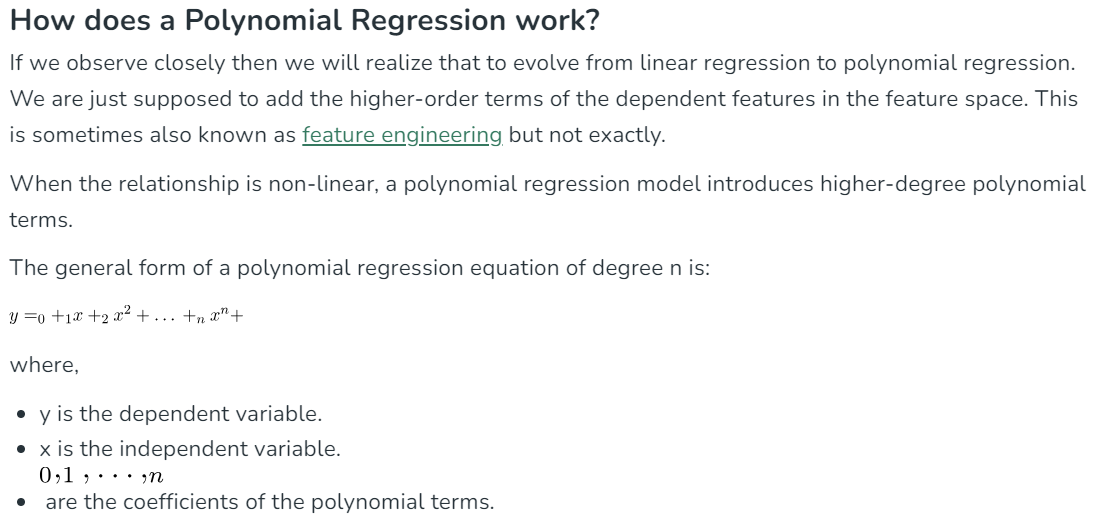

The choice of the polynomial degree (n) is a crucial aspect of polynomial regression. A higher degree allows the model to fit the training data more closely, but it may also lead to overfitting, especially if the degree is too high. Therefore, the degree should be chosen based on the complexity of the underlying relationship in the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Ashutosh Thakur\Desktop\ML tuts\Dataset\Poly_data.csv")
df

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


<AxesSubplot:xlabel='Temperature', ylabel='Pressure'>

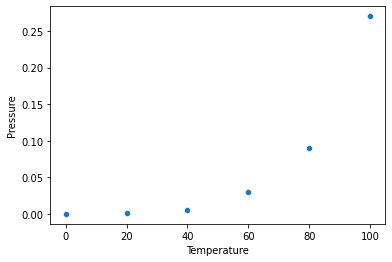

In [3]:
sns.scatterplot(data = df, x = 'Temperature', y = 'Pressure')

In [10]:
x = np.array(df['Temperature'])
x = x.reshape(-1,1)
y = np.array(df['Pressure'])

In [11]:
# Let us fit a linear regression model first on the data
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(x,y)

LinearRegression()

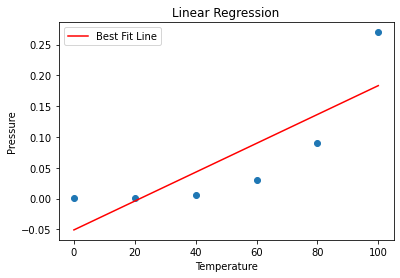

In [34]:
plt.scatter(df['Temperature'],df['Pressure'])
# Instead of np.dot(x,lin.coef_)+lin.intercept_ , we can also use lin.predict(x)
plt.plot(x,np.dot(x,lin.coef_)+lin.intercept_,label = "Best Fit Line",color = 'r')
plt.title('Linear Regression')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.legend()
plt.show()

In [16]:
# Now fitting polynomial features
from sklearn.preprocessing import PolynomialFeatures

In [18]:
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(x)

In [19]:
# 1,x,x2,x3,x4
X_poly

array([[1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [1.000e+00, 2.000e+01, 4.000e+02, 8.000e+03, 1.600e+05],
       [1.000e+00, 4.000e+01, 1.600e+03, 6.400e+04, 2.560e+06],
       [1.000e+00, 6.000e+01, 3.600e+03, 2.160e+05, 1.296e+07],
       [1.000e+00, 8.000e+01, 6.400e+03, 5.120e+05, 4.096e+07],
       [1.000e+00, 1.000e+02, 1.000e+04, 1.000e+06, 1.000e+08]])

In [30]:
lin2 = LinearRegression()
lin2.fit(X_poly,y)

LinearRegression()

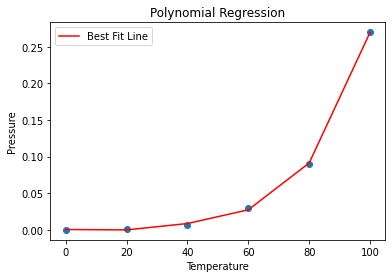

In [35]:
plt.scatter(df['Temperature'],df['Pressure'])
# Instead of np.dot(X_poly,lin2.coef_)+lin2.intercept_ , we can also use lin2.predict(X_poly)
plt.plot(x,np.dot(X_poly,lin2.coef_)+lin2.intercept_,label = "Best Fit Line",color = 'r')
plt.title('Polynomial Regression')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.legend()
plt.show()

While dealing with the polynomial regression one thing that we face is the problem of overfitting this happens because while we increase the order of the polynomial regression to achieve better and better performance model gets overfit on the data and does not perform on the new data points.

Due to this reason only while using the polynomial regression, do we try to penalize the weights of the model to regularize the effect of the overfitting problem. Regularization techniques like Lasso regression and Ridge regression methodologies are used whenever we deal with a situation in which the model may overfit the data at hand.